# Notebook 1: Cleaning and EDA

This notebook is 1 if 2 in project 4. This notebook aims to clean, explore and visualize the data in order to make more intelligent decisions on our feature selection for modelling. 


**Problem Statement: Can we predict if someone is staying in the US or going abroad on thier AirBnB vacation?**

### Imports and Reading in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./airbnb-recruiting-new-user-bookings/train_users_2_copy.csv')

In [3]:
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [4]:
countries = pd.read_csv('airbnb-recruiting-new-user-bookings/countries.csv')

# Cleaning The Data

### Step 1: Creating addtional columns

In [5]:
df_m = pd.merge(left = df,right = countries, on='country_destination')

In [6]:
df_m.shape

(78814, 22)

In [7]:
df_m.isnull().sum()

id                                   0
date_account_created                 0
timestamp_first_active               0
date_first_booking                   0
gender                               0
age                              17858
signup_method                        0
signup_flow                          0
language                             0
affiliate_channel                    0
affiliate_provider                   0
first_affiliate_tracked           1625
signup_app                           0
first_device_type                    0
first_browser                        0
country_destination                  0
lat_destination                      0
lng_destination                      0
distance_km                          0
destination_km2                      0
destination_language                 0
language_levenshtein_distance        0
dtype: int64

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
df_m['gender'].value_counts()

FEMALE       28833
-unknown-    25549
MALE         24278
OTHER          154
Name: gender, dtype: int64

In [10]:
df_m['gender']=df_m['gender'].map({'MALE':0, 'FEMALE':1, 'OTHER': 2,'-unknown-':3 })

In [11]:
df_m['gender']

0        1
1        3
2        3
3        1
4        1
        ..
78809    1
78810    0
78811    1
78812    1
78813    1
Name: gender, Length: 78814, dtype: int64

### Step 2: Dealing with Null Values

In [12]:
df_m.isnull().sum()

id                                   0
date_account_created                 0
timestamp_first_active               0
date_first_booking                   0
gender                               0
age                              17858
signup_method                        0
signup_flow                          0
language                             0
affiliate_channel                    0
affiliate_provider                   0
first_affiliate_tracked           1625
signup_app                           0
first_device_type                    0
first_browser                        0
country_destination                  0
lat_destination                      0
lng_destination                      0
distance_km                          0
destination_km2                      0
destination_language                 0
language_levenshtein_distance        0
dtype: int64

In [13]:
# Age - adding median age to the age column to fill null values

In [14]:
df_m['age'].median()

33.0

In [15]:
df_m['age'].fillna(33, inplace=True)

In [16]:
df_m['age'].isnull().sum()

0

In [17]:
#first affiliate tracked nulls
df_m['first_affiliate_tracked'].fillna('', inplace = True)

In [18]:
df_m.isnull().sum()

id                               0
date_account_created             0
timestamp_first_active           0
date_first_booking               0
gender                           0
age                              0
signup_method                    0
signup_flow                      0
language                         0
affiliate_channel                0
affiliate_provider               0
first_affiliate_tracked          0
signup_app                       0
first_device_type                0
first_browser                    0
country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64

### Step 3: EDA & Data Viz

##### Looking to see if there are any variables that would cause problems later on

<AxesSubplot:>

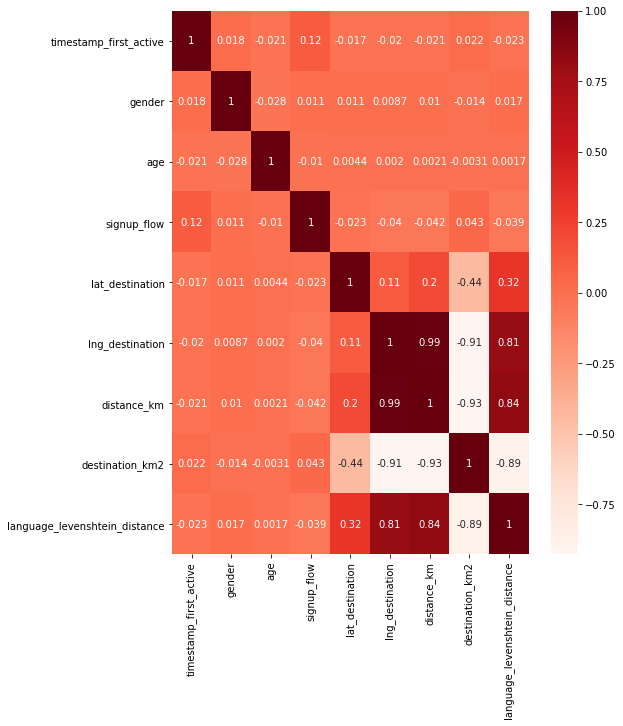

In [19]:
plt.figure(figsize=(8,10))
sns.heatmap(df_m.corr(), annot=True,cmap='Reds')


### Country destination historgram

Here we see the distribution of country destinations, and how skewed it is to the US. This led us to the decision to binarize the country destinations column and create the variables 1 = US, 0 = other. 

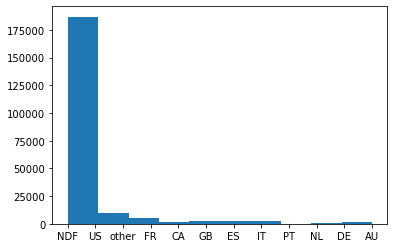

In [20]:
plt.hist(x=df['country_destination']);

/Users/merylduff/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


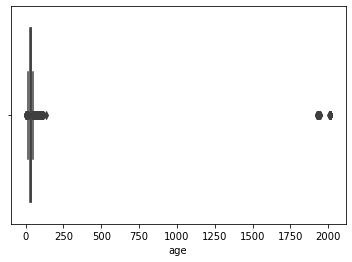

In [21]:
sns.boxplot(df_m['age']);

In [23]:
df_m['age'].describe()

count    78814.000000
mean        44.410092
std        128.060123
min          2.000000
25%         30.000000
50%         33.000000
75%         38.000000
max       2014.000000
Name: age, dtype: float64

In [24]:
df_m = df_m[df_m['age'] < 100]

In [26]:
df_m = df_m[df_m['age'] > 18]

In [27]:
df_m

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,1,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,36.966427,-95.84403,0.000,9826675.0,eng,0.0
1,87mebub9p4,2010-09-14,20091208061105,2010-02-18,3,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,36.966427,-95.84403,0.000,9826675.0,eng,0.0
2,osr2jwljor,2010-01-01,20100101215619,2010-01-02,3,33.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,36.966427,-95.84403,0.000,9826675.0,eng,0.0
3,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,1,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,36.966427,-95.84403,0.000,9826675.0,eng,0.0
4,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,1,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,36.966427,-95.84403,0.000,9826675.0,eng,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78809,egikxlfmh8,2014-06-26,20140626022743,2014-06-26,1,32.0,basic,0,en,seo,google,linked,Web,Windows Desktop,Chrome,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
78810,oitccptcw6,2014-06-26,20140626065256,2014-07-28,0,48.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
78811,86s1bo34bg,2014-06-30,20140630023309,2015-06-29,1,40.0,facebook,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
78812,ms2453k9vj,2014-06-30,20140630052141,2014-08-22,1,63.0,basic,0,en,seo,google,omg,Web,Windows Desktop,Chrome,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0


### Saving to CSV

In [28]:
df_m.to_csv('cleaned_dataframe.csv',index=False)